# Linear regression - Assignment 1

## Importing libraries : Numpy, Pandas, Matplotlib and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data using pandas and making a dataframe.

In [2]:
df = pd.read_csv("Concrete_Data.csv")

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Checking the data information (meta)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## Seperating the Dependent and independent variables

In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [8]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

### Univariate Analysis

In [82]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Plotting density plots for `x` features

C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\GANPATI\AppData\Local\Temp\ipykernel_11604\3196644809.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


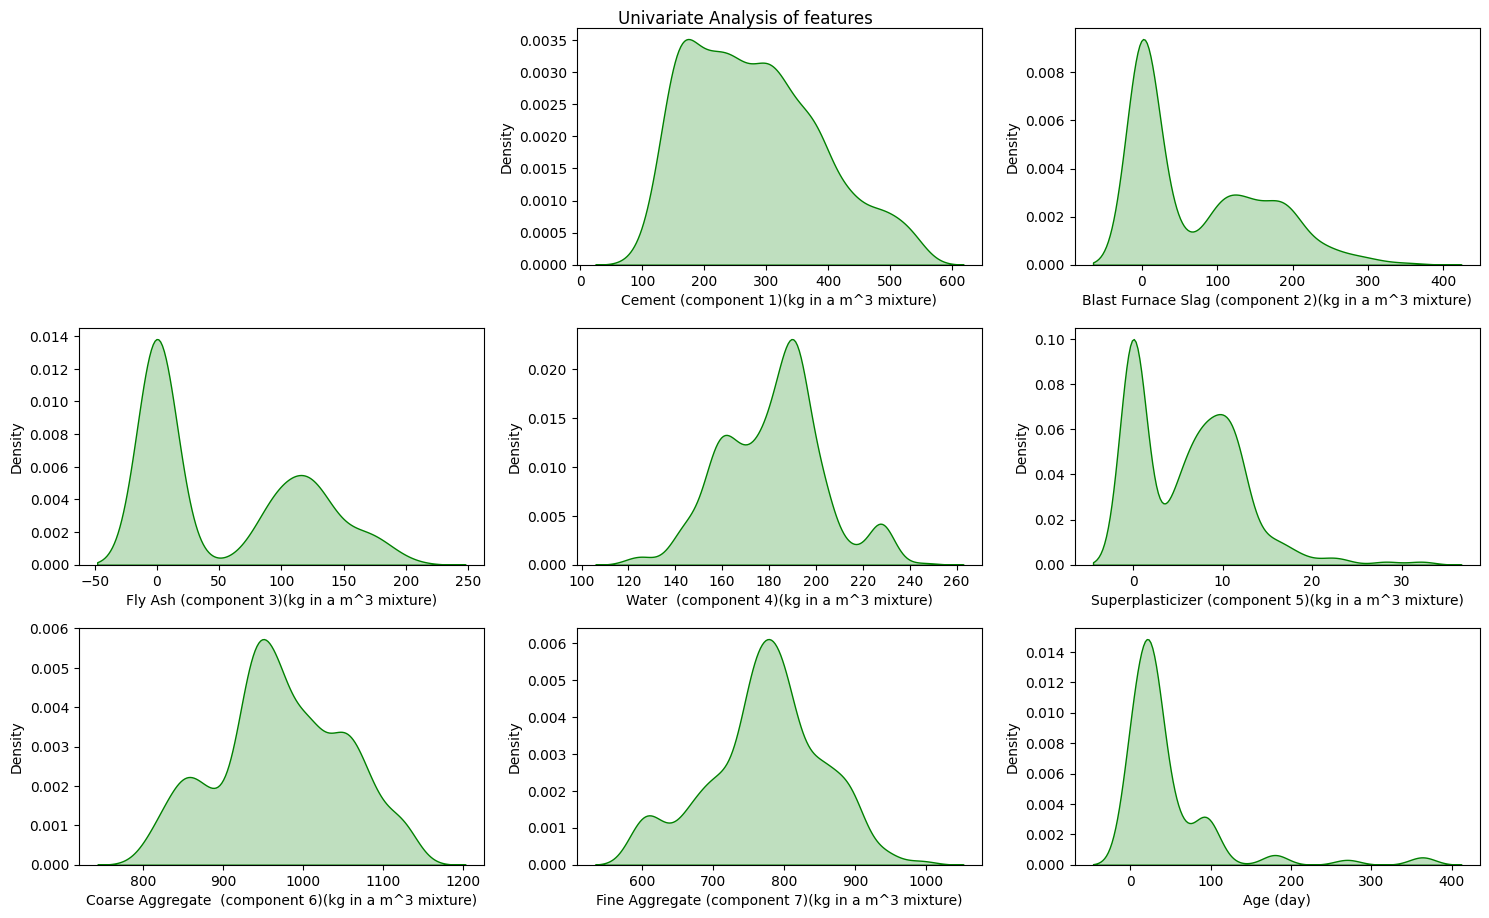

In [81]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of features')

for i in range(1,len(x.columns)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=x.iloc[:,i],fill=True, color='g')
    plt.xlabel(x.columns[i])
    plt.tight_layout()

### Multi-Variate Analysis

<Axes: >

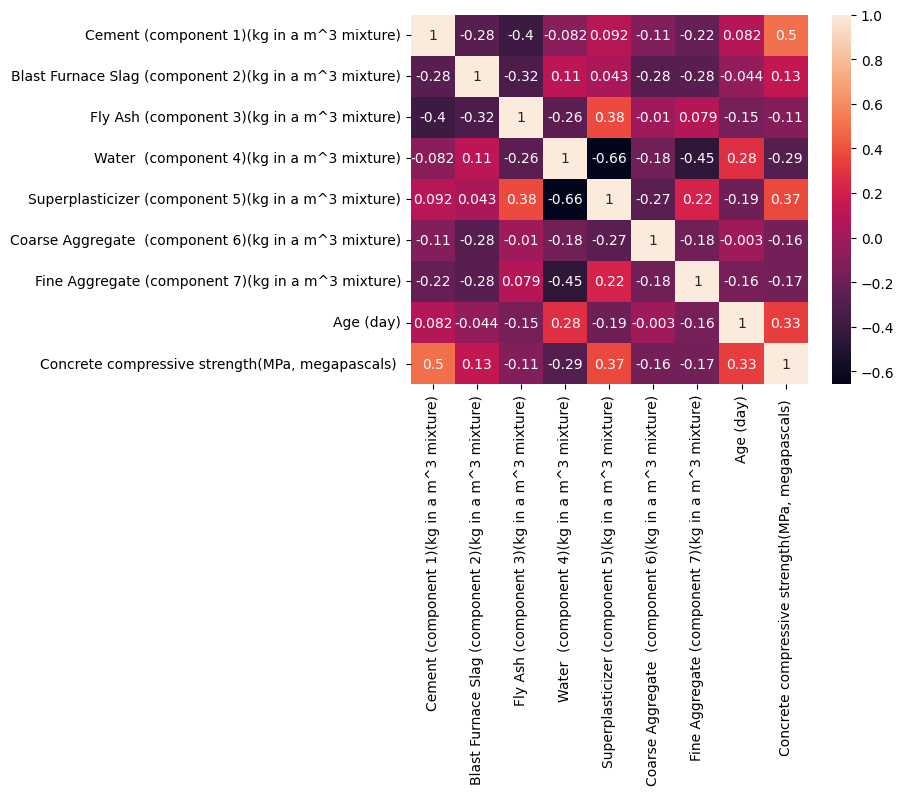

In [84]:
sns.heatmap(df.corr(),annot = True)

## Data Preperation

### To prepare the data for least square method, we need to add a column with '1' value

In [9]:
x.insert(0,'one',1)

In [10]:
x

,one,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...,...
1025,1,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,1,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,1,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,1,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## Split data for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
x_train

,one,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
567,1,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7
961,1,336.5,0.0,0.0,181.9,3.4,985.8,816.8,28
462,1,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,100
412,1,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,3
750,1,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,28
...,...,...,...,...,...,...,...,...,...
289,1,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3
337,1,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,56
976,1,298.1,0.0,107.5,163.6,12.8,953.2,784.0,28
584,1,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7


## Linear regression using least square method

In [14]:
x_t = np.transpose(x_train)

In [15]:
x_sqr = np.dot(x_t,x_train)

In [16]:
xt_y = np.dot(x_t,y_train)

In [17]:
xsqr_inv = np.linalg.inv(x_sqr)

In [18]:
para = np.dot(xsqr_inv,xt_y)

In [19]:
para

array([-4.14394683e+01,  1.27625195e-01,  1.07436900e-01,  9.94411669e-02,
       -1.27916255e-01,  2.90245121e-01,  2.23375386e-02,  2.88921775e-02,
        1.11064573e-01])

#### Predicting the target values using the trained model

In [20]:
y_pred = np.dot(x_test,para)

In [21]:
y_pred

array([33.18476081, 30.63198453, 50.63547723, 53.59319697, 32.85378894,
       50.06475286, 27.84534156, 34.01541504, 54.04328515, 26.85769659,
       35.76671894, 31.1079407 , 33.9512019 , 25.35147183, 53.45165009,
       25.57549851, 16.5931508 , 34.2360044 , 25.98964656, 56.63562506,
       64.14662488, 44.5614164 , 41.00649888, 53.30979793, 22.71230818,
       45.93522755, 20.92796964, 29.70224604, 51.53403138, 34.15728083,
       21.22622173, 40.40796601, 31.808439  , 48.66949226, 22.22097566,
       18.16900988, 46.52181157, 45.11292372, 19.4497427 , 32.23286384,
       22.10990091, 30.81503461, 39.03084122, 30.97550393, 25.89875255,
       26.43642849, 24.96582382, 27.17928505, 65.50817694, 56.575051  ,
       39.51741008, 51.50919882, 24.22958005, 32.6569109 , 50.56994761,
       31.23880071, 68.53670187, 27.16036624, 37.30864145, 36.65491233,
       35.43976331, 27.42010186, 48.87563448, 25.85510231, 32.9734032 ,
       43.99198569, 35.11711213, 17.55625714, 37.05068085, 51.99

### Checking the R2 Score

In [22]:
from sklearn.metrics import r2_score

In [23]:
score = r2_score(y_test,y_pred)

In [24]:
score

0.601549450960229

### Linear regression - Least square method using library `statsmodels.api`

In [60]:
import statsmodels.api as sm

lin_reg_lib = sm.OLS(y_train,x_train).fit()

In [64]:
lin_reg_lib.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.619
Model:                                                          OLS   Adj. R-squared:                  0.614
Method:                                               Least Squares   F-statistic:                     144.4
Date:                                              Mon, 12 Feb 2024   Prob (F-statistic):          1.65e-143
Time:                                                      21:33:54   Log-Likelihood:                -2712.6
No. Observations:                                               721   AIC:                             5443.
Df Residuals:                                                   712   BIC:                             5485.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
one                                                     -41.4395     31.956     -1.297      0.195    -104.179      21.300
Cement (component 1)(kg in a m^3 mixture)                 0.1276      0.010     12.418      0.000       0.107       0.148
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1074      0.012      8.827      0.000       0.084       0.131
Fly Ash (component 3)(kg in a m^3 mixture)                0.0994      0.015      6.446      0.000       0.069       0.130
Water  (component 4)(kg in a m^3 mixture)                -0.1279      0.049     -2.620      0.009      -0.224      -0.032
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2902      0.116      2.499      0.013       0.062       0.518
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0223      0.011      2.007      0.045       0.000       0.044
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0289      0.013      2.227      0.026       0.003       0.054
Age (day)                                                 0.1111      0.006     17.596      0.000       0.099       0.123
==============================================================================
Omnibus:                        4.395   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.480
Skew:                          -0.185   Prob(JB):                        0.106
Kurtosis:                       2.892   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regression using gradient descent method

### Standardizing the dependent variable dataset

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
scaler

StandardScaler()

In [27]:
scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

array([[ 0.        , -1.26894541,  1.31669118, ..., -1.23628207,
        -0.96079955, -0.29179844],
       [ 0.        , -1.0975869 , -0.68192555, ...,  0.43218221,
         1.10065322, -0.29179844],
       [ 0.        ,  0.4097702 ,  2.4773676 , ..., -0.40534209,
        -1.46473923, -0.66256016],
       ...,
       [ 0.        , -1.17131091, -0.84153323, ...,  0.42296417,
         1.68161996,  0.97938458],
       [ 0.        , -0.68612723, -0.84153323, ...,  1.05374112,
         0.05621864,  0.97938458],
       [ 0.        , -0.50580229, -0.84153323, ...,  1.09193012,
         0.08363504, -0.29179844]])

### Defining the Batch Gradient Descent function

In [28]:
coef = np.ones(9)

In [29]:
def grad_desc(x,y,al,epoch):
    m = y.size
    theta = [1,1,1,1,1,1,1,1,1]
    h = np.dot(x,theta)
    cost = np.ones(epoch)

    for i in range(epoch):
        theta[0] = theta[0] - al*(1/m)*sum(h-y)
        for j in range(1,9):
            slope = (al*(1/m)*np.dot((h - y),np.transpose(x.iloc[:,j])))
            theta[j] = theta[j] - slope
        h = np.dot(x,theta)
        cost[i] = 1/(2*m)*sum(np.square(h-y))
        if abs(slope) < 0.00000001:
            break         
    return theta,cost

In [30]:
coef, j = grad_desc(x_train,y_train,0.000001,40000)

In [31]:
coef

[0.9961980511426743,
 0.10302449125393917,
 0.07886805972402643,
 0.056666812660857865,
 -0.13796020902868328,
 0.698393638200152,
 0.010378540160997783,
 0.0030269889161816436,
 0.10904684800438608]

#### Checking the predicted values of the model

In [32]:
gd_prd = np.dot(x_test, coef)
gd_prd1 = np.dot(x_train, coef)

In [33]:
test_score = r2_score(y_test,gd_prd)
train_score= r2_score(y_train,gd_prd1)

#### Checking the test score and training score

In [34]:
print(test_score)
print(train_score)

0.5953127930249793
0.6085671417108878


### Mini gradient descent

In [45]:
def mini_grad_desc(x,y,al,epoch):
    m = y.size
    theta = [1,1,1,1,1,1,1,1,1]
    cost = np.ones(epoch)
    k = 10
    
    si = m//k
    for l in range(1,k):
        x_mini, y_mini = x.iloc[l*si:(l+1)*si,:],y.iloc[l*si:(l+1)*si]
        h = np.dot(x_mini,theta)
        
        for i in range(epoch):
            theta[0] = theta[0] - al*(1/si)*sum(h-y_mini)
            for j in range(1,9):
                slope = (al*(1/si)*np.dot((h - y_mini),np.transpose(x_mini.iloc[:,j])))
                theta[j] = theta[j] - slope
            h = np.dot(x_mini,theta)
            cost[i] = 1/(2*si)*sum(np.square(h-y_mini))
        if abs(slope) < 0.00000001:
            return theta,cost
    return theta,cost

In [46]:
coef, j = mini_grad_desc(x_train,y_train,0.000001,40000)

In [47]:
coef

[0.9956242318209352,
 0.12762685614379032,
 0.10619277115942496,
 0.10673435969934338,
 -0.22899882429037233,
 0.5625120621944762,
 0.01459917385318328,
 0.004914408753323642,
 0.09312351791569498]

In [48]:
gd_prd = np.dot(x_test, coef)
gd_prd1 = np.dot(x_train, coef)
score = r2_score(y_test,gd_prd)
score1= r2_score(y_train,gd_prd1)
print(score)
print(score1)

0.5233432657312498
0.5653498893454951


## Checking for the Assumptions

### 1. Linearity

C:\Users\GANPATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


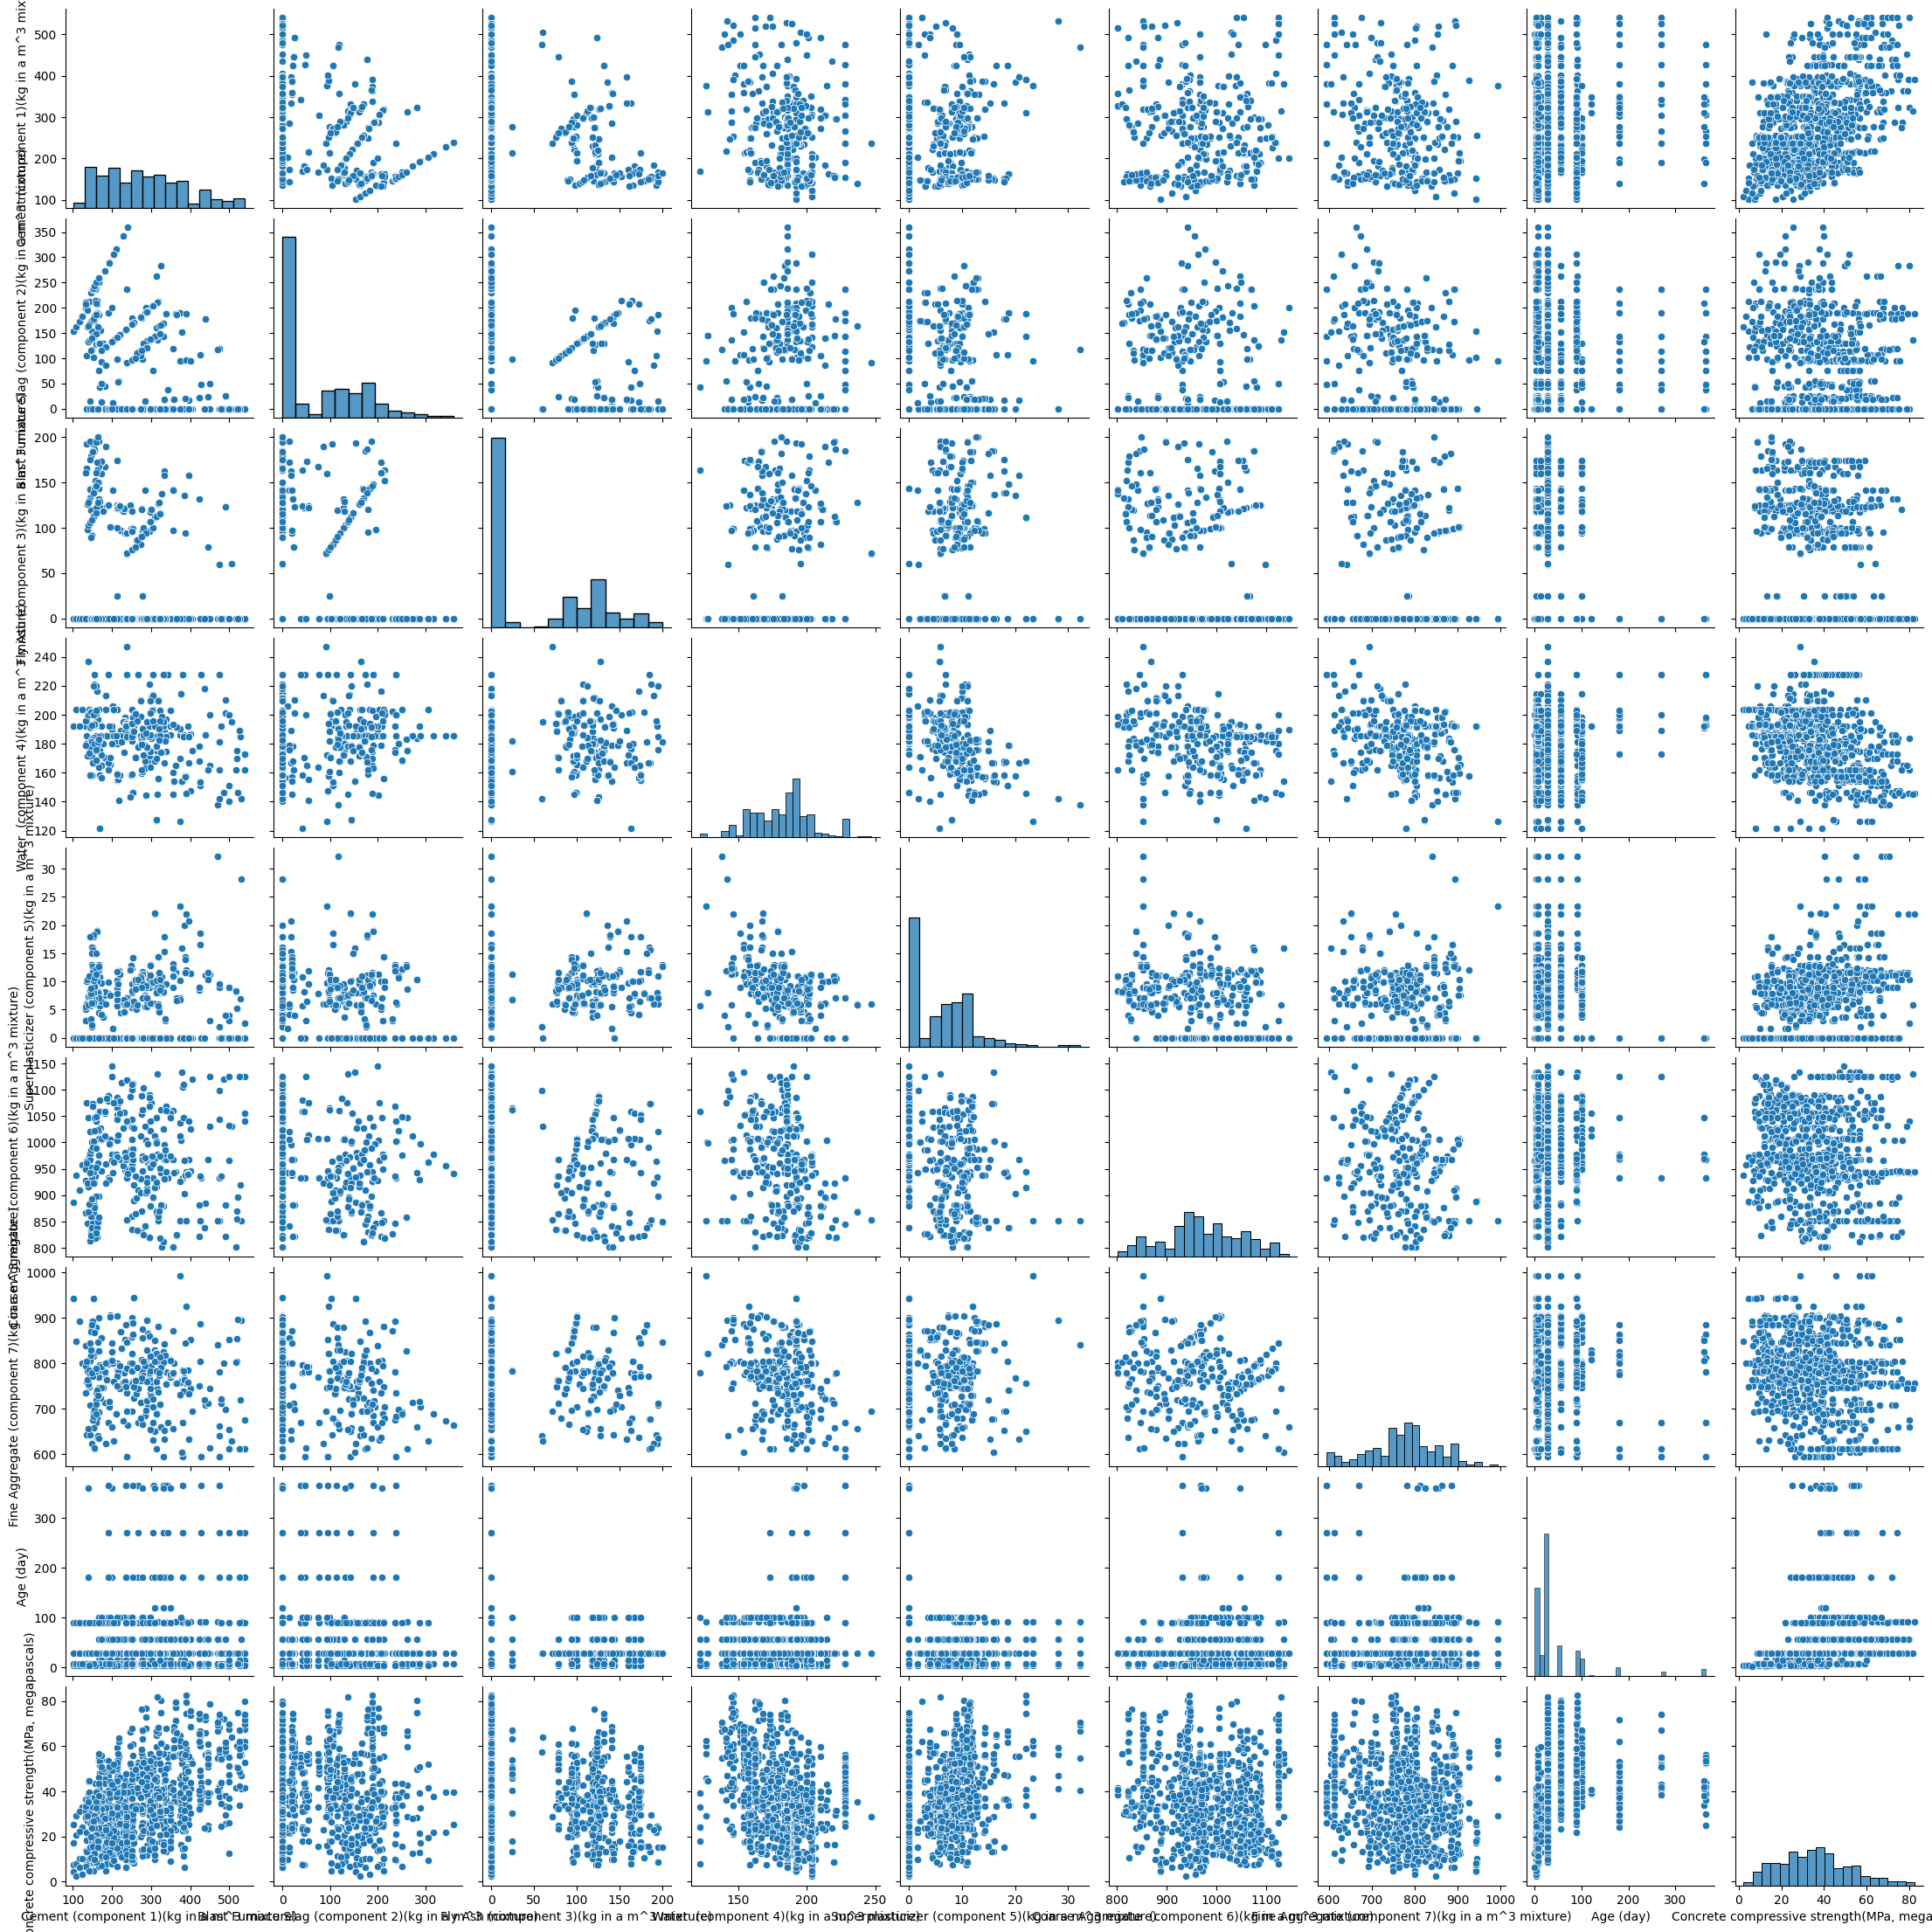

In [49]:
sns.pairplot(df)

#### Relationship between Real Data & Predicted Data

Text(0, 0.5, 'Test predicted data')

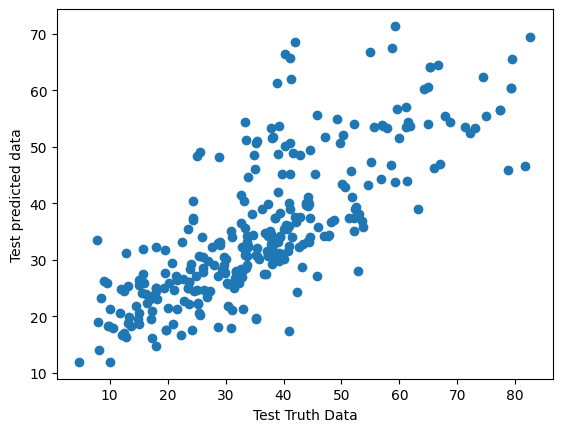

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted data")

#### We can see from the plot that the linearity holds.

#### Calculating the residuals

In [41]:
residuals = y_test - y_pred

In [42]:
residuals

978    -4.194761
436     3.058015
107    -0.835477
380     3.636803
647    10.526211
         ...    
899    -5.669862
432     1.652843
458     5.416193
348     6.643587
271     4.606944
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [68]:
residuals.mean()

1.0522822629057276

### Here, we can see that the residuals mean is not zero. Hence, Gauss-Markow Theorem for BLUE is not satisfied.

### 2. Normality of y

C:\Users\GANPATI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


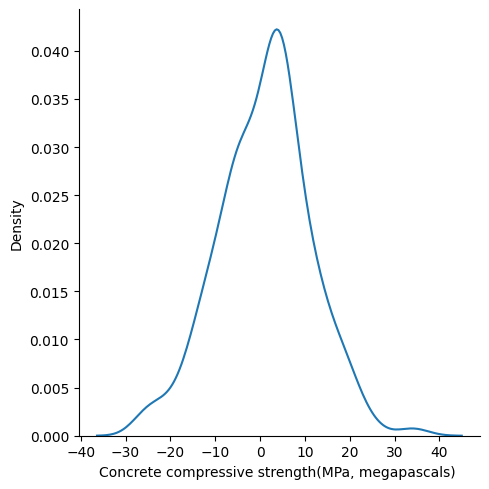

In [43]:
sns.displot(residuals, kind = 'kde')

##### Observation - it is close the normal distribution but with slightly more peakedness

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Count'>

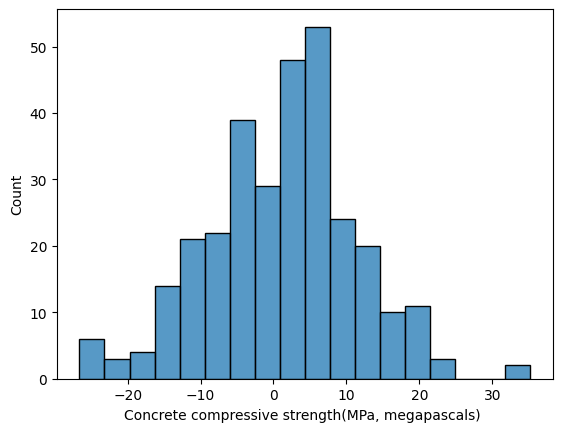

In [52]:
sns.histplot(residuals)

#### Plotting `QQ - plot` 

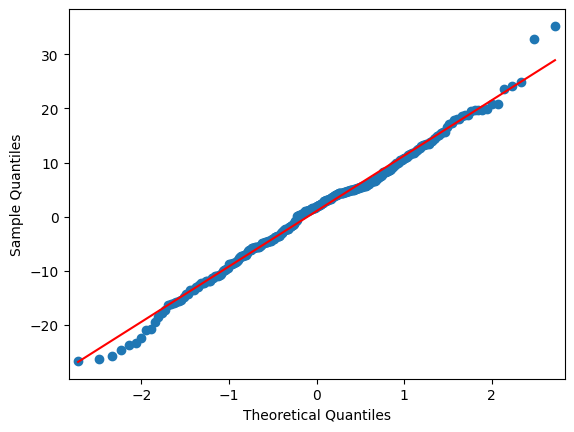

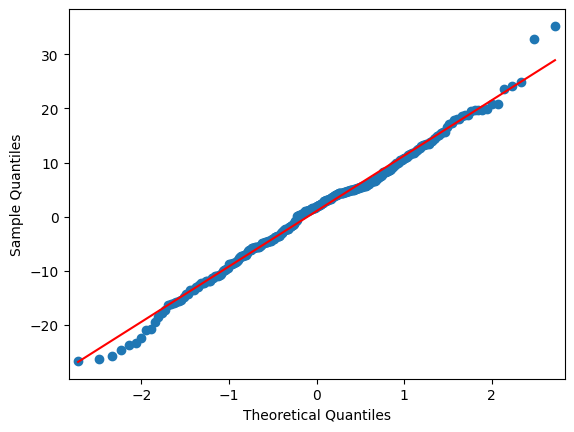

In [73]:
sm.ProbPlot(residuals).qqplot(line ='s')

#### We can observe that the residuals are (nearly) Normally distributed

In [53]:
from scipy.stats import shapiro

In [55]:
shapiro(y_pred)

ShapiroResult(statistic=0.9485170841217041, pvalue=6.295469034967027e-09)

#### Since p-value = 6.2954 e-09, which is very less (even lesser than 0.1%),
#### Normality of y holds.

### 3. Homoscedacity - Scatter plot with predictions and residuals

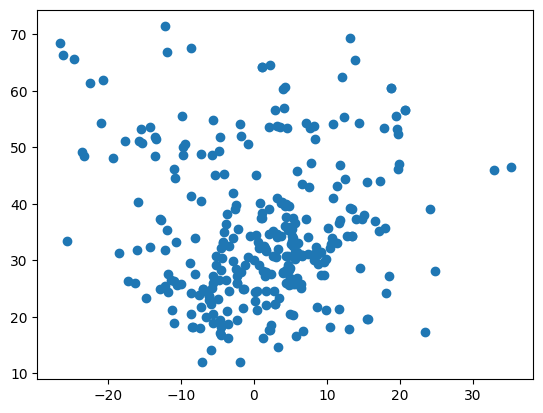

In [56]:
plt.scatter(residuals,y_pred)

#### Obseravtion - The spread seems to be less uniformly distributed 

### 4. Multi-collinearity

<Axes: >

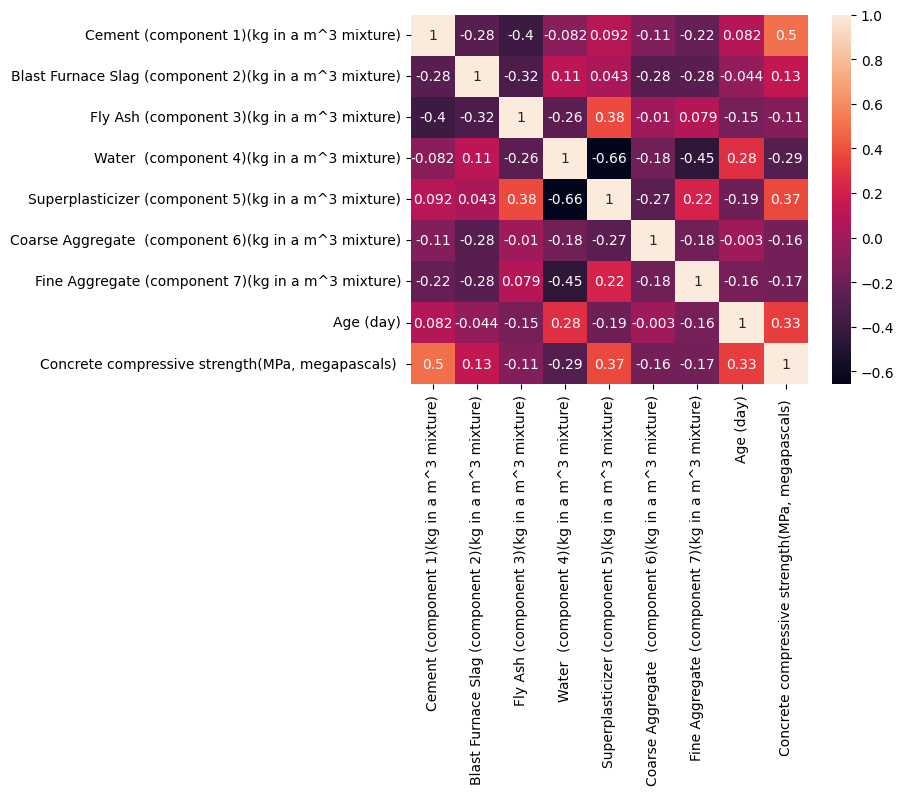

In [50]:
sns.heatmap(df.corr(),annot = True)

In [72]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,one,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
vif,6731.811539,7.488944,7.276963,6.170634,7.003957,2.963776,5.074617,7.005081,1.118367


#### Here, Other than column `one` , all features have `VIF` < 10 
### No (Perfect) Multi-collinearity

### 5. Auto - Collinearity

#### Auto-Correlation plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

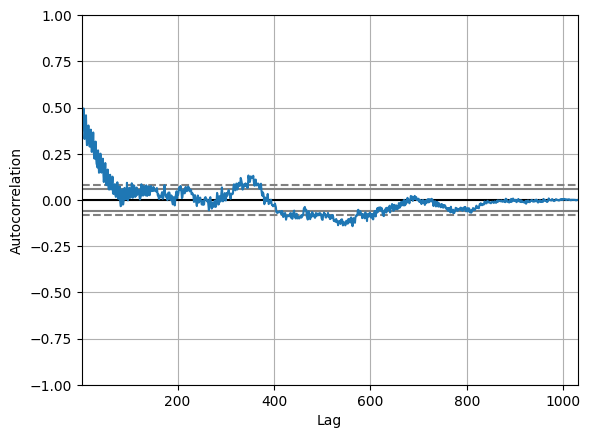

In [76]:
pd.plotting.autocorrelation_plot(y)

#### Durbin-Watson test

In [74]:
lin_reg_lib.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.619
Model:                                                          OLS   Adj. R-squared:                  0.614
Method:                                               Least Squares   F-statistic:                     144.4
Date:                                              Mon, 12 Feb 2024   Prob (F-statistic):          1.65e-143
Time:                                                      22:10:38   Log-Likelihood:                -2712.6
No. Observations:                                               721   AIC:                             5443.
Df Residuals:                                                   712   BIC:                             5485.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
one                                                     -41.4395     31.956     -1.297      0.195    -104.179      21.300
Cement (component 1)(kg in a m^3 mixture)                 0.1276      0.010     12.418      0.000       0.107       0.148
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1074      0.012      8.827      0.000       0.084       0.131
Fly Ash (component 3)(kg in a m^3 mixture)                0.0994      0.015      6.446      0.000       0.069       0.130
Water  (component 4)(kg in a m^3 mixture)                -0.1279      0.049     -2.620      0.009      -0.224      -0.032
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2902      0.116      2.499      0.013       0.062       0.518
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0223      0.011      2.007      0.045       0.000       0.044
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0289      0.013      2.227      0.026       0.003       0.054
Age (day)                                                 0.1111      0.006     17.596      0.000       0.099       0.123
==============================================================================
Omnibus:                        4.395   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.480
Skew:                          -0.185   Prob(JB):                        0.106
Kurtosis:                       2.892   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Durbin-Watson : ` 2.078 `  --> Very close to 2 
### `NO Auto-Correlation`
